### Depth Limited Search (DLS)

In [1]:
def dls(graph, current, goal, depth_limit):
    if current == goal:
        return True
    
    if depth_limit <= 0:
        return False
    
    for neighbor in graph.get(current, []):
        if dls(graph, neighbor, goal, depth_limit - 1):
            return True
    
    return False

In [2]:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'G': ['H']
}

In [3]:
# Example 1
print("Example 1 (Depth = 3):", dls(graph, 'A', 'H', 3))

Example 1 (Depth = 3): True


In [4]:
# Example 2
print("Example 2 (Depth = 2):", dls(graph, 'A', 'H', 2))

Example 2 (Depth = 2): False


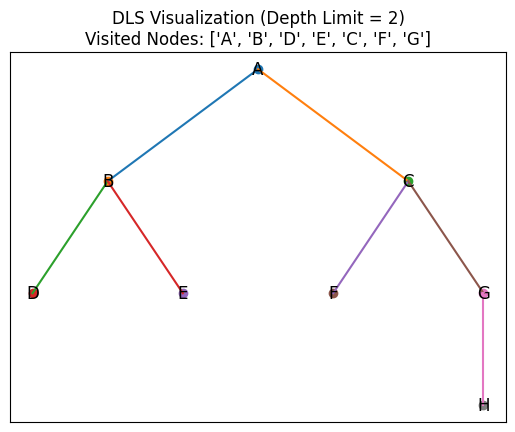

Visited Nodes: ['A', 'B', 'D', 'E', 'C', 'F', 'G']
Goal Found: False


In [5]:
#  Visualization Code for DLS (Depth Limited Search)
# This will show where the search stops due to depth limit

import matplotlib.pyplot as plt

# Define tree structure
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'G': ['H']
}

# Fixed positions for clean tree visualization
positions = {
    'A': (0, 3),
    'B': (-2, 2),
    'C': (2, 2),
    'D': (-3, 1),
    'E': (-1, 1),
    'F': (1, 1),
    'G': (3, 1),
    'H': (3, 0)
}

visited_nodes = []

def dls_visual(graph, current, goal, depth_limit, depth=0):
    visited_nodes.append(current)
    
    if current == goal:
        return True
    
    if depth >= depth_limit:
        return False
    
    for neighbor in graph.get(current, []):
        if dls_visual(graph, neighbor, goal, depth_limit, depth + 1):
            return True
    
    return False

# Example where depth limit causes failure
goal = 'H'
depth_limit = 2   # H is at depth 3, so it will not be found

dls_visual(graph, 'A', goal, depth_limit)

# Plot the graph
plt.figure()

# Draw edges
for node in graph:
    for neighbor in graph[node]:
        x_values = [positions[node][0], positions[neighbor][0]]
        y_values = [positions[node][1], positions[neighbor][1]]
        plt.plot(x_values, y_values)

# Draw nodes
for node, (x, y) in positions.items():
    plt.scatter(x, y)
    plt.text(x, y, node, fontsize=12, ha='center', va='center')

plt.title("DLS Visualization (Depth Limit = 2)\nVisited Nodes: " + str(visited_nodes))
plt.xticks([])
plt.yticks([])
plt.show()

print("Visited Nodes:", visited_nodes)
print("Goal Found:", goal in visited_nodes)
